In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
# import traceback
# import warnings
# import sys

# def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

#     log = file if hasattr(file,'write') else sys.stderr
#     traceback.print_stack(file=log)
#     log.write(warnings.formatwarning(message, category, filename, lineno, line))

# warnings.showwarning = warn_with_traceback

In [3]:

from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit


starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields


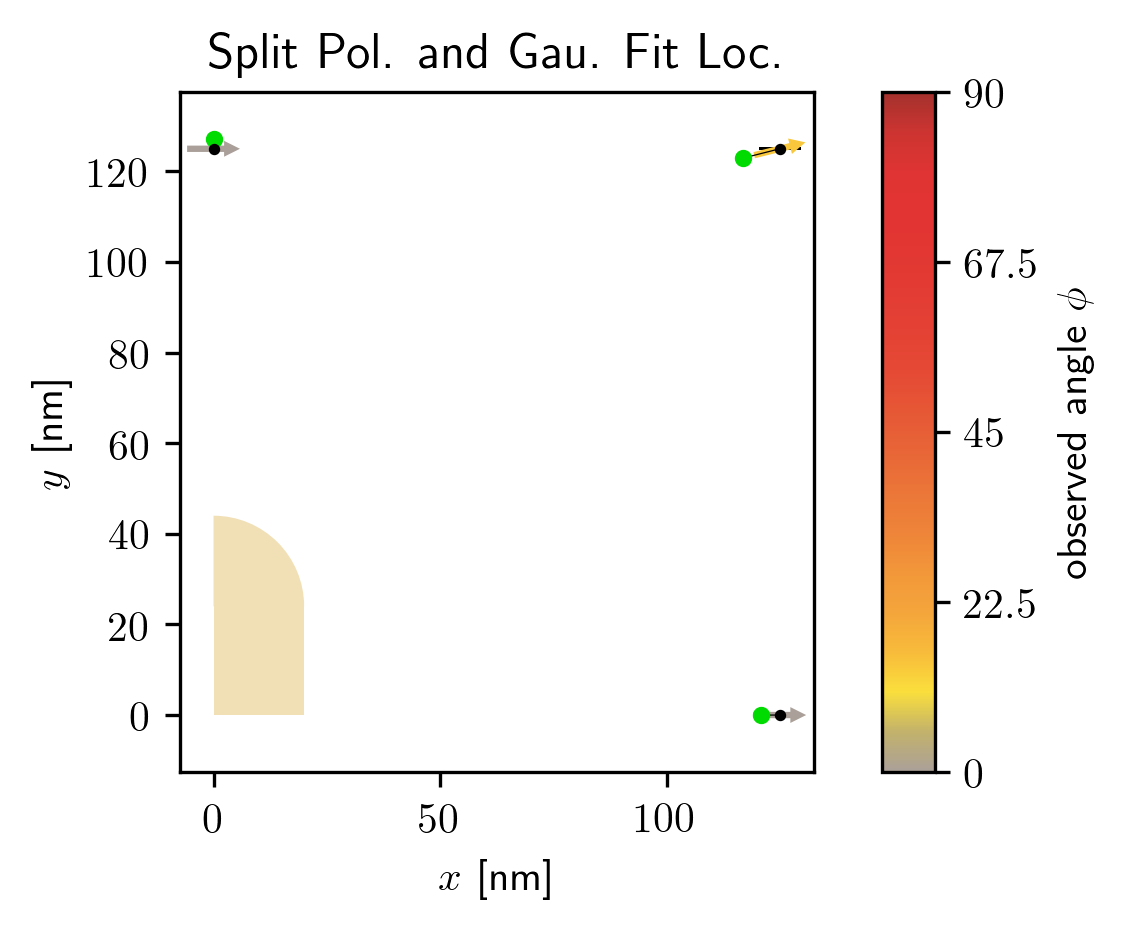

In [4]:
locations_100, angles_100 = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=2, x_max=125, y_max=125)
simTestInst_few_mol_h_100 = bem.SimulatedExperiment(
    locations_100, 
    mol_angle=0,
    param_file='curly_nrod_water_JC',
    simulation_type='rod')
simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.calculate_BEM_fields()

simTestInst_few_mol_h_100.plot_mispol_map_wMisloc()


 initial guess for molecule 0 location: (0.008965912824922692,127.15093337361)
Checking inital guess
self.rod_angle,  1.5707963267948966 
 ini_x,  0.008965912824922692 
 ini_y,  127.15093337361 
 self.quel_a,  61.77701186 
 self.quel_c,  25.96014311 

In quenching zone? False

 initial guess for molecule 1 location: (120.86118616955352,-0.02132117900958149)
Checking inital guess
self.rod_angle,  1.5707963267948966 
 ini_x,  120.86118616955352 
 ini_y,  -0.02132117900958149 
 self.quel_a,  61.77701186 
 self.quel_c,  25.96014311 

In quenching zone? False

 initial guess for molecule 2 location: (116.8546255493349,122.92416902293027)
Checking inital guess
self.rod_angle,  1.5707963267948966 
 ini_x,  116.8546255493349 
 ini_y,  122.92416902293027 
 self.quel_a,  61.77701186 
 self.quel_c,  25.96014311 

In quenching zone? False


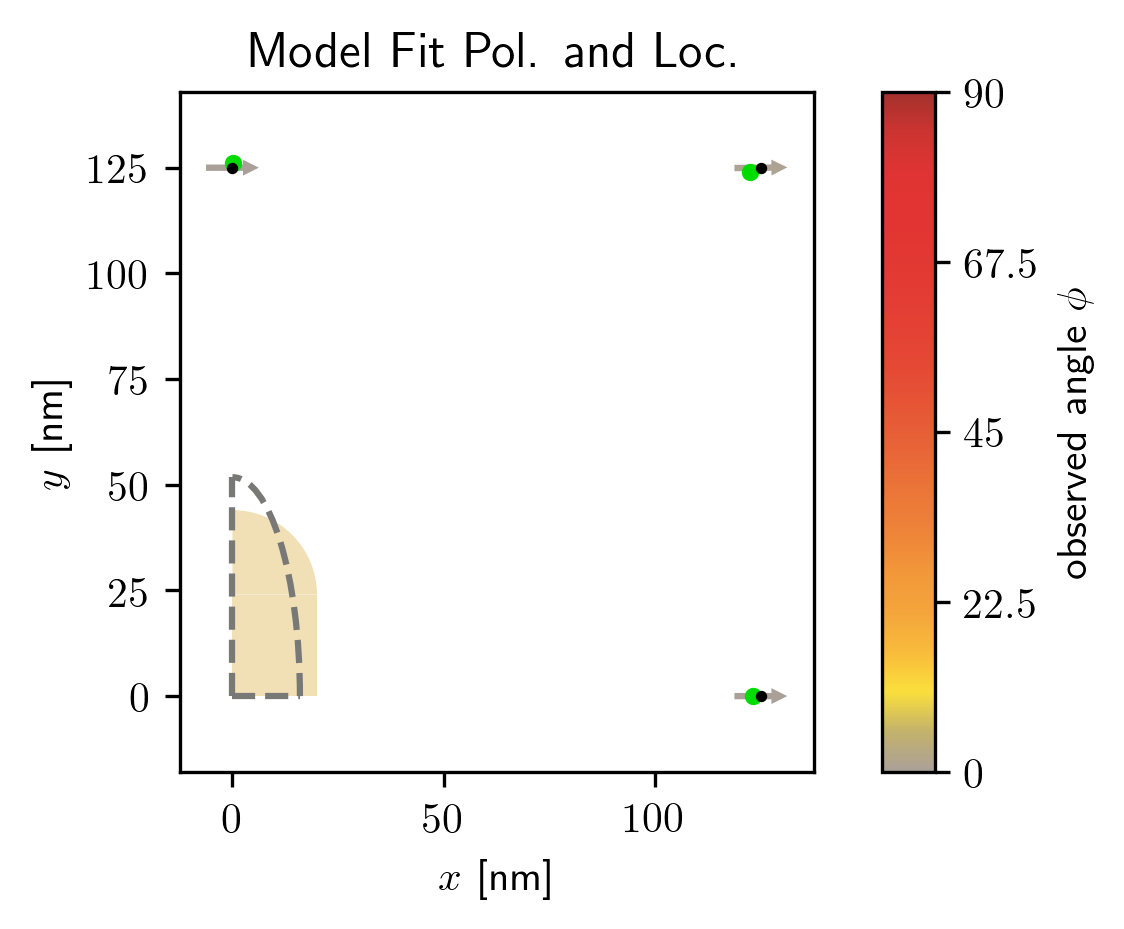

In [5]:
# Model fit
# Gaussian guess, checked

test_BEM_fit_instance_few_mol_h_100 = fit.FitModelToData(
    simTestInst_few_mol_h_100.BEM_images, 
#     ini_guess=simTestInst_few_mol.mol_locations,
    ini_guess='gauss',
    param_file='curly_nrod_water_JC'
    )
test_BEM_fit_few_mol_h_100 = test_BEM_fit_instance_few_mol_h_100.fit_model_to_image_data(
    check_ini=True)

## Plot fit results
test_BEM_fit_instance_few_mol_h_100.plot_fit_results_as_quiver_map(simTestInst_few_mol_h_100)   

Save datas

In [6]:
# bem.save_fit_inst(test_BEM_fit_instance_few_mol_h_100, simTestInst_few_mol_h_100, 'fig5/fig5')

Test load

In [7]:
# loaded_fit_inst = bem.LoadedFit('fig5', param_file='curly_nrod_water_JC.yaml')

In [8]:
# fig5 = bem.fig5(loaded_fit_inst.loaded_sim_exp_instance, loaded_fit_inst, draw_quadrant=True)

modifying plotting function to suit Julie's requests

In [9]:
# fig5.savefig('fig5.pdf', dpi=500, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)